In [40]:
import os                                   
from sklearn.metrics import confusion_matrix
import seaborn as sn                        
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf   
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
from IPython.display import display

In [20]:
# Here's our 7 categories that we have to classify.
class_names = ['anger', 'contempt', 'disgust', 
               'fear', 'happy', 'sadness', 'surprise']
class_names_label = {'anger': 0,
                    'contempt' : 1,
                    'disgust' : 2,
                    'fear' : 3,
                    'happy' : 4,
                    'sadness' : 5,
                    'surprise' : 6
                    }
nb_classes = 7

# Function for loading data(Previously I had already separated datasets intro train and test, now I got all in one, and I will split later)

In [21]:
def load_data():
    datasets = ['face_emotions']
    size = (128,128)
    output = []
    for dataset in datasets:
        directory = "C:/Users/AndriiHura/input/" + dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     ### Shuffle the data !!!
        images = np.array(images, dtype = 'float32') ### Our images
        labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        
        output.append((images, labels))

    return output

#  Asigning data

In [22]:
(face_data, face_targets) = load_data()[0]

# Scaling data

In [23]:
face_data = face_data / 255.0 


# Example Output

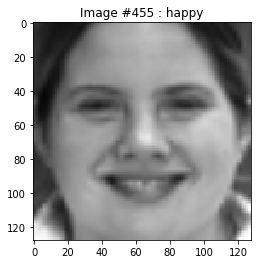

In [24]:
index = np.random.randint(face_data.shape[0])
plt.figure()
plt.imshow(face_data[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[face_targets[index]])
plt.show()

# Splitting into test and train

In [25]:
train_images, test_images, train_labels, test_labels = train_test_split(face_data, face_targets, test_size=0.2, random_state=52)

# Image size

In [26]:
face_data[1].shape

(128, 128, 3)

# How much data we have

In [27]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 784
Number of testing examples: 197
Each image is of size: (128, 128, 3)


# Data visualization

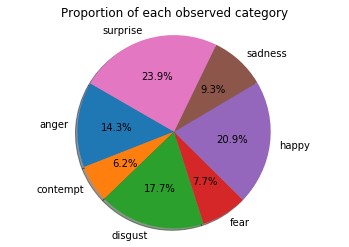

In [28]:
sizes = np.bincount(train_labels)
explode = (0, 0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()


# Some more examples

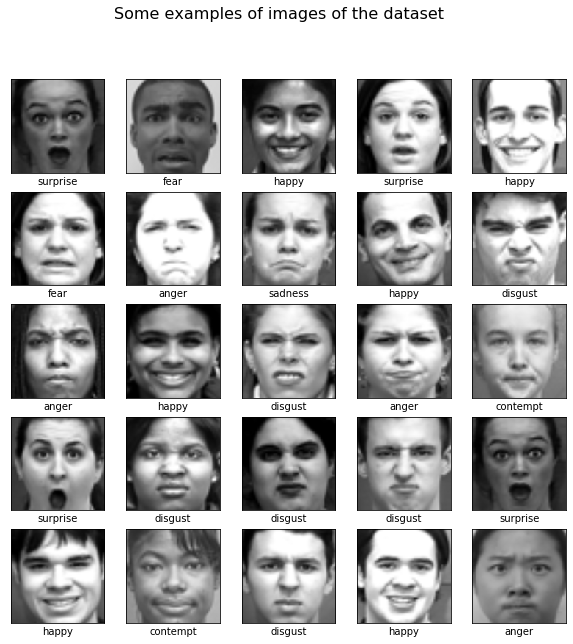

In [29]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Defining 1st model(128 layers)

In [92]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 128, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])

In [93]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning 1st model with 5 epochs

In [94]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Train on 627 samples, validate on 157 samples
Epoch 1/5
627/627 [==============================] - 8s 13ms/sample - loss: 2.8921 - accuracy: 0.1962 - val_loss: 2.0154 - val_accuracy: 0.2803
Epoch 2/5
627/627 [==============================] - 8s 13ms/sample - loss: 1.8739 - accuracy: 0.1866 - val_loss: 1.8751 - val_accuracy: 0.3439
Epoch 3/5
627/627 [==============================] - 8s 13ms/sample - loss: 1.7583 - accuracy: 0.4258 - val_loss: 1.8300 - val_accuracy: 0.2484
Epoch 4/5
627/627 [==============================] - 8s 13ms/sample - loss: 1.5803 - accuracy: 0.4609 - val_loss: 1.6287 - val_accuracy: 0.4013
Epoch 5/5
627/627 [==============================] - 8s 13ms/sample - loss: 1.3500 - accuracy: 0.5152 - val_loss: 1.3843 - val_accuracy: 0.5669


# Plotting dependency between epoch number and accuracy/loss on training/validation

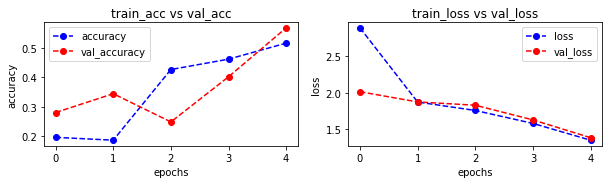

In [95]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history['loss'],'bo--', label = "loss")
plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

In [110]:
test_loss = model.evaluate(test_images, test_labels)

197/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Testing on some image

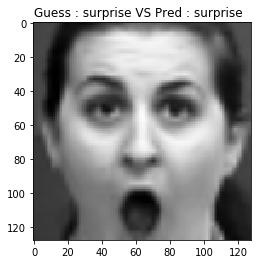

In [58]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

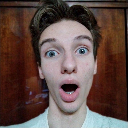

In [59]:
img_me_surprise = Image.open('my_face_surprise_1.jpg')
newsize = (128, 128) 
img_me_surprise =  img_me_surprise.resize(newsize) 
display(img_me_surprise)
img_me_surprise = np.array(img_me_surprise, dtype = 'float32')
img_me_surprise = img_me_surprise/255.0

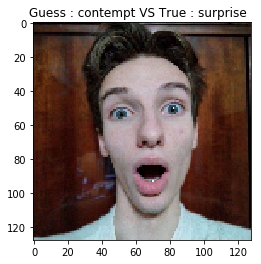

In [60]:
img_1 = (np.expand_dims(img_me_surprise, 0))
predictions = model.predict(img_1)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "surprise"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_me_surprise)
plt.grid(False)
plt.title(title)
plt.show()

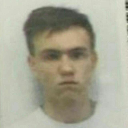

In [21]:
img_kolyan_sadness = Image.open('kolyan_face_sadness.jpg')
newsize = (128, 128) 
img_kolyan_sadness =  img_kolyan_sadness.resize(newsize) 
display(img_kolyan_sadness)
img_kolyan_sadness = np.array(img_kolyan_sadness, dtype = 'float32')
img_kolyan_sadness = img_kolyan_sadness/255.0

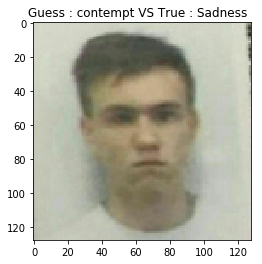

In [61]:
img_2 = (np.expand_dims(img_kolyan_sadness, 0))
predictions = model.predict(img_2)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Sadness"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_kolyan_sadness)
plt.grid(False)
plt.title(title)
plt.show()

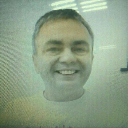

In [62]:
img_grebenuk_happy = Image.open('grebenuk_happy.jpg')
newsize = (128, 128) 
img_grebenuk_happy =  img_grebenuk_happy.resize(newsize) 
display(img_grebenuk_happy)
img_grebenuk_happy = np.array(img_grebenuk_happy, dtype = 'float32')
img_grebenuk_happy = img_grebenuk_happy/255.0

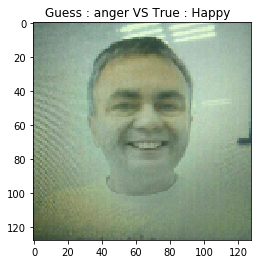

In [47]:
img_3 = (np.expand_dims(img_grebenuk_happy, 0))
predictions = model.predict(img_3)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Happy"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_grebenuk_happy)
plt.grid(False)
plt.title(title)
plt.show()

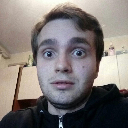

In [25]:
img_misha_surprise = Image.open('misha_surprise.jpg')
newsize = (128, 128) 
img_misha_surprise =  img_misha_surprise.resize(newsize) 
display(img_misha_surprise)
img_misha_surprise = np.array(img_misha_surprise, dtype = 'float32')
img_misha_surprise = img_misha_surprise/255.0

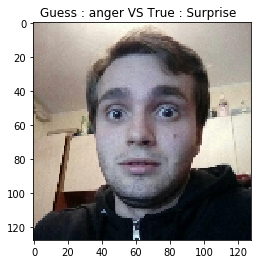

In [63]:
img_4 = (np.expand_dims(img_misha_surprise, 0))
predictions = model.predict(img_4)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Surprise"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_misha_surprise)
plt.grid(False)
plt.title(title)
plt.show()

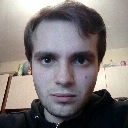

In [27]:
img_misha_anger = Image.open('misha_anger.jpg')
newsize = (128, 128) 
img_misha_anger =  img_misha_anger.resize(newsize) 
display(img_misha_anger)
img_misha_anger = np.array(img_misha_anger, dtype = 'float32')
img_misha_anger = img_misha_anger/255.0

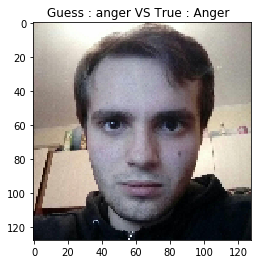

In [64]:
img_5 = (np.expand_dims(img_misha_anger, 0))
predictions = model.predict(img_5)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Anger"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_misha_anger)
plt.grid(False)
plt.title(title)
plt.show()

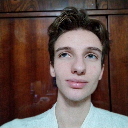

In [50]:
img_me_happy = Image.open('me_happy.jpg')
newsize = (128, 128) 
img_me_happy =  img_me_happy.resize(newsize) 
display(img_me_happy)
img_me_happy = np.array(img_me_happy, dtype = 'float32')
img_me_happy = img_me_happy/255.0

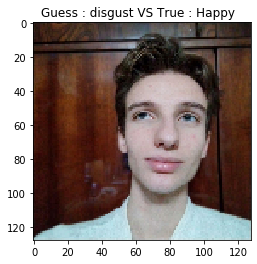

In [65]:
img_6 = (np.expand_dims(img_me_happy, 0))
predictions = model.predict(img_6)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Happy"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_me_happy)
plt.grid(False)
plt.title(title)
plt.show()

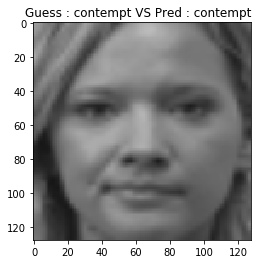

In [66]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

# Defining 2nd model(1024 nodes)

In [30]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',
                           input_shape = (128, 128, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])

In [31]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning 2nd model with 20 epochs

In [32]:
history2 = model2.fit(train_images, train_labels, 
                      batch_size=128, epochs=20, validation_split = 0.2)

Train on 627 samples, validate on 157 samples
Epoch 1/20
627/627 [==============================] - 22s 35ms/sample - loss: 4.5183 - accuracy: 0.1802 - val_loss: 2.0827 - val_accuracy: 0.0764
Epoch 2/20
627/627 [==============================] - 12s 19ms/sample - loss: 1.8856 - accuracy: 0.2998 - val_loss: 1.7765 - val_accuracy: 0.4013
Epoch 3/20
627/627 [==============================] - 11s 17ms/sample - loss: 1.6592 - accuracy: 0.4179 - val_loss: 1.5185 - val_accuracy: 0.6115
Epoch 4/20
627/627 [==============================] - 10s 17ms/sample - loss: 1.3848 - accuracy: 0.5885 - val_loss: 1.2124 - val_accuracy: 0.6433
Epoch 5/20
627/627 [==============================] - 11s 17ms/sample - loss: 1.0279 - accuracy: 0.6986 - val_loss: 0.8801 - val_accuracy: 0.7580
Epoch 6/20
627/627 [==============================] - 11s 18ms/sample - loss: 0.7111 - accuracy: 0.8054 - val_loss: 0.6079 - val_accuracy: 0.8153
Epoch 7/20
627/627 [==============================] - 11s 17ms/sample - loss: 

# Plotting dependency between epoch number and accuracy/loss on training/validation

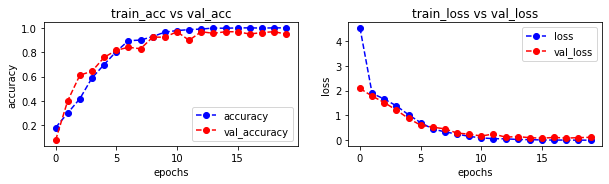

In [33]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history2.history['accuracy'],'bo--', label = "accuracy")
plt.plot(history2.history['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history2.history['loss'],'bo--', label = "loss")
plt.plot(history2.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

In [34]:
test_loss2 = model2.evaluate(test_images, test_labels)

197/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Testing on some image

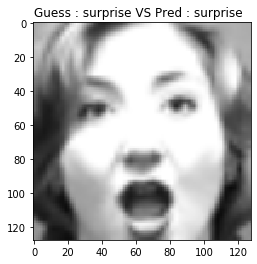

In [35]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model2.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

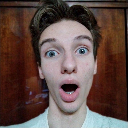

In [59]:
from PIL import Image
from IPython.display import display
img_me_surprise = Image.open('my_face_surprise_1.jpg')
newsize = (128, 128) 
img_me_surprise =  img_me_surprise.resize(newsize) 
display(img_me_surprise)
img_me_surprise = np.array(img_me_surprise, dtype = 'float32')
img_me_surprise = img_me_surprise/255.0

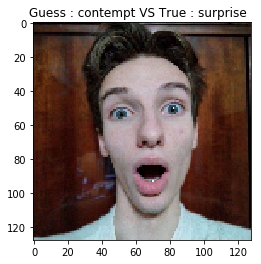

In [71]:
img_1 = (np.expand_dims(img_me_surprise, 0))
predictions = model2.predict(img_1)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "surprise"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_me_surprise)
plt.grid(False)
plt.title(title)
plt.show()

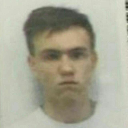

In [21]:
img_kolyan_sadness = Image.open('kolyan_face_sadness.jpg')
newsize = (128, 128) 
img_kolyan_sadness =  img_kolyan_sadness.resize(newsize) 
display(img_kolyan_sadness)
img_kolyan_sadness = np.array(img_kolyan_sadness, dtype = 'float32')
img_kolyan_sadness = img_kolyan_sadness/255.0

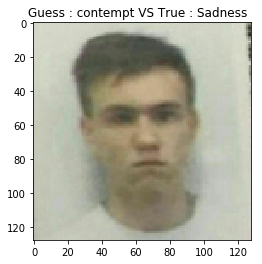

In [72]:
img_2 = (np.expand_dims(img_kolyan_sadness, 0))
predictions = model2.predict(img_2)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Sadness"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_kolyan_sadness)
plt.grid(False)
plt.title(title)
plt.show()

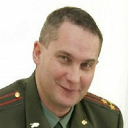

In [129]:
img_voenkomat_happy = Image.open('voenkomat_happy.jpg')
newsize = (128, 128) 
img_voenkomat_happy =  img_voenkomat_happy.resize(newsize) 
display(img_voenkomat_happy)
img_voenkomat_happy = np.array(img_voenkomat_happy, dtype = 'float32')
img_voenkomat_happy = img_voenkomat_happy/255.0

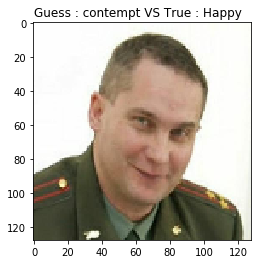

In [130]:
img_3 = (np.expand_dims(img_voenkomat_happy, 0))
predictions = model2.predict(img_3)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Happy"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_voenkomat_happy)
plt.grid(False)
plt.title(title)
plt.show()

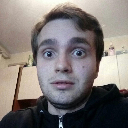

In [131]:
img_misha_surprise = Image.open('misha_surprise.jpg')
newsize = (128, 128) 
img_misha_surprise =  img_misha_surprise.resize(newsize) 
display(img_misha_surprise)
img_misha_surprise = np.array(img_misha_surprise, dtype = 'float32')
img_misha_surprise = img_misha_surprise/255.0

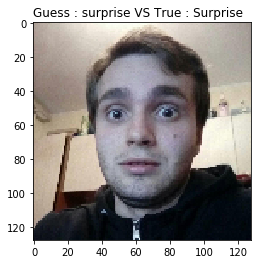

In [132]:
img_4 = (np.expand_dims(img_misha_surprise, 0))
predictions = model.predict(img_4)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Surprise"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_misha_surprise)
plt.grid(False)
plt.title(title)
plt.show()

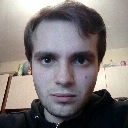

In [133]:
img_misha_anger = Image.open('misha_anger.jpg')
newsize = (128, 128) 
img_misha_anger =  img_misha_anger.resize(newsize) 
display(img_misha_anger)
img_misha_anger = np.array(img_misha_anger, dtype = 'float32')
img_misha_anger = img_misha_anger/255.0

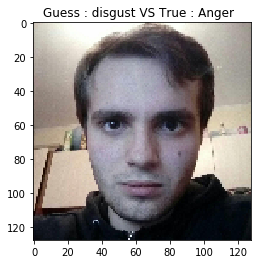

In [134]:
img_5 = (np.expand_dims(img_misha_anger, 0))
predictions = model.predict(img_5)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Anger"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_misha_anger)
plt.grid(False)
plt.title(title)
plt.show()

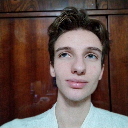

In [50]:
img_me_happy = Image.open('me_happy.jpg')
newsize = (128, 128) 
img_me_happy =  img_me_happy.resize(newsize) 
display(img_me_happy)
img_me_happy = np.array(img_me_happy, dtype = 'float32')
img_me_happy = img_me_happy/255.0

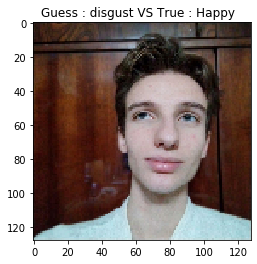

In [135]:
img_6 = (np.expand_dims(img_me_happy, 0))
predictions = model.predict(img_6)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Happy"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_me_happy)
plt.grid(False)
plt.title(title)
plt.show()

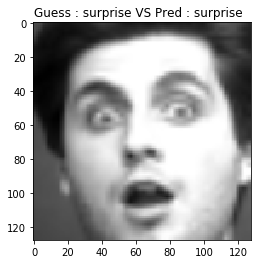

In [77]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

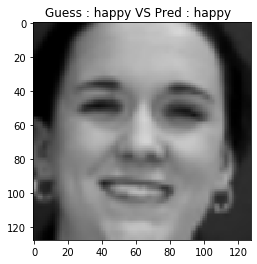

In [78]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

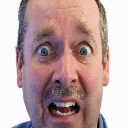

In [79]:
img_fear = Image.open('fear_1.jpg')
newsize = (128, 128) 
img_fear =  img_fear.resize(newsize) 
display(img_fear)
img_fear = np.array(img_fear, dtype = 'float32')
img_fear = img_fear/255.0

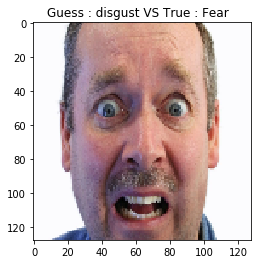

In [136]:
img_7 = (np.expand_dims(img_fear, 0))
predictions = model.predict(img_7)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Fear"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_fear)
plt.grid(False)
plt.title(title)
plt.show()

In [126]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    print(len(mislabeled_indices[0]), " - amount of mislabeled images")
    mislabeled_images = test_images[mislabeled_indices]
    actual_labels = test_labels[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
    amount = len(mislabeled_indices[0])
    if(amount>25):
        amount = 25
    for i in range(amount):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]]+"("+class_names[actual_labels[i]]+")")
    plt.show()

# Mislabeled images for 2nd model

12  - amount of mislabeled images


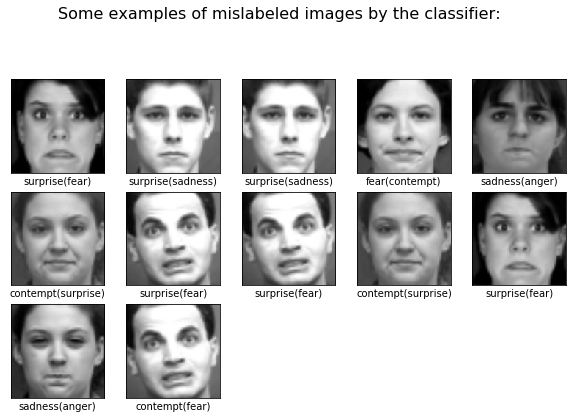

In [128]:
predictions = model2.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

### Great result!

73  - amount of mislabeled images


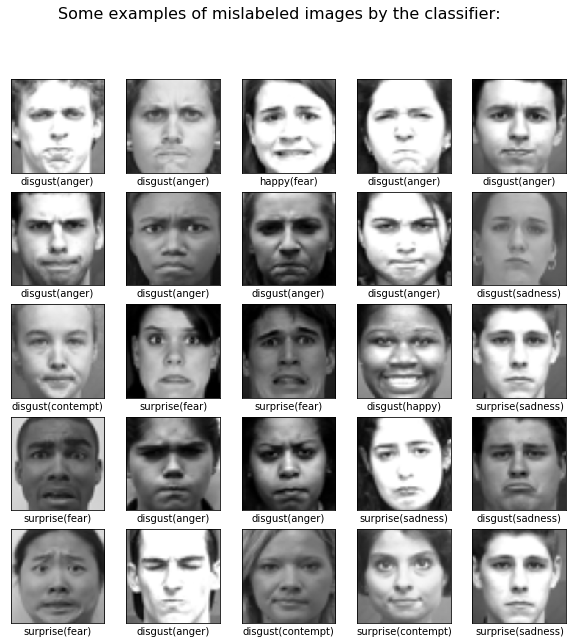

In [127]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

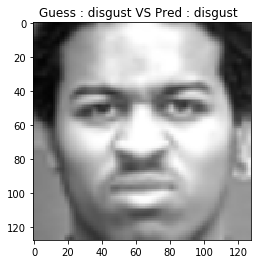

In [37]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model2.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

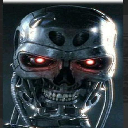

In [41]:
img_terminator_face = Image.open('terminator_face.jpg')
newsize = (128, 128) 
img_terminator_face =  img_terminator_face.resize(newsize) 
display(img_terminator_face)
img_terminator_face = np.array(img_terminator_face, dtype = 'float32')
img_terminator_face = img_terminator_face/255.0

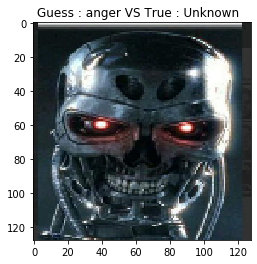

In [45]:
img_8 = (np.expand_dims(img_terminator_face, 0))
predictions = model2.predict(img_8)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Unknown"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_terminator_face)
plt.grid(False)
plt.title(title)
plt.show()

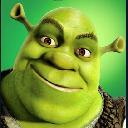

In [46]:
img_shrek_happy = Image.open('shrek_face_happy.jpg')
newsize = (128, 128) 
img_shrek_happy =  img_shrek_happy.resize(newsize) 
display(img_shrek_happy)
img_shrek_happy = np.array(img_shrek_happy, dtype = 'float32')
img_shrek_happy = img_shrek_happy/255.0

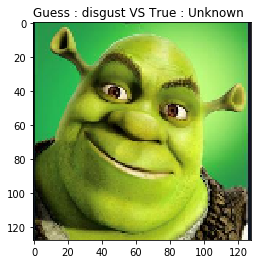

In [47]:
img_9 = (np.expand_dims(img_shrek_happy, 0))
predictions = model2.predict(img_9)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Unknown"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_shrek_happy)
plt.grid(False)
plt.title(title)
plt.show()

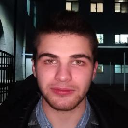

In [49]:
img_danilo_face = Image.open('danil_face.jpg')
newsize = (128, 128) 
img_danilo_face =  img_danilo_face.resize(newsize) 
display(img_danilo_face)
img_danilo_face = np.array(img_danilo_face, dtype = 'float32')
img_danilo_face = img_danilo_face/255.0

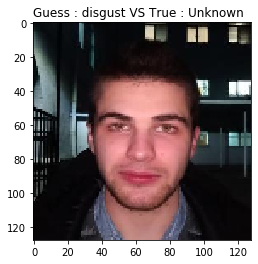

In [50]:
img_10 = (np.expand_dims(img_danilo_face, 0))
predictions = model2.predict(img_10)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = "Unknown"

title = 'Guess : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(img_danilo_face)
plt.grid(False)
plt.title(title)
plt.show()